# **Restaurant Recommendation**

## **Problem Statement**

Problem Statement: \
1. Customer mana yang banyak melakukan pesanan ke
vendor?
2. Kapan penjualan tertinggi restoran tersebut terjadi? 
3. Bagaimanakah hubungan transaksi dengan customer?
4. Vendor manakah yang paling banyak melakukan suplai produk? Vendor manakah yang memiliki rating tertinggi?

## **Mengkoneksikan Colab dengan Gdrive**

In [ ]:
# Pertama kita perlu untuk mengkoneksikan Google Colab dengan Google Drive kita agar dapat mengakses file yang disimpan dalam Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Packages**

In [ ]:
# Import Packages
import os
import sqlite3
import numpy as np
import statistics
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## **Setting Path**

In [ ]:
# Memuat data
path = '/content/drive/MyDrive/Narasio Data Bootcamp/Capstone Project/3. Restaurant Recommendation/'

# Cek Directory
os.listdir(path)

['Restaurant_Dataset.db',
 'Customers_cleaned.csv',
 'Orders_cleaned.csv',
 'Vendors_cleaned.csv',
 'Locations_cleaned.csv']

## **Membuat Connection ke Database**

In [ ]:
# Membuat connection ke database yang udah ada
conn = sqlite3.connect(path + 'Restaurant_Dataset.db')

# Membuat cursor object untuk memanggil SQL statement
cur = conn.cursor()

In [ ]:
# Mengecek terdapat tabel apa saja di Restaurant_Dataset.db
cur.execute("""
              SELECT 
                  name 
              FROM sqlite_master 
              WHERE type='table'
            """)

print(cur.fetchall())

[('Orders',), ('Customers',), ('Vendors',), ('Locations',), ('Orders_cleaned',), ('Vendors_cleaned',), ('Locations_cleaned',), ('Customers_cleaned',)]


## **Menampilkan Data Masing-Masing Tabel**

Data yang diberikan adalah suatu database, maka perlu dilakukan query untuk menampilka datanya, lalu *assign* ke dalam suatu variable.

In [ ]:
# Menampilkan data Tabel Customers menggunakan SQL dan meng-assign ke variable 'df_customers'
df_customers = pd.read_sql_query("SELECT * FROM Customers", conn)
df_customers.head()

,customer_id,gender,dob,status,verified,created_at,updated_at
0,ICE2DJP,male,2006,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36
1,FWNUI71,male,2007,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47
2,LRX7BCH,male,1992,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15
3,D96DHMD,male,1999,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52
4,88Q8Y5V,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09


In [ ]:
# Menampilkan data Tabel Orders menggunakan SQL dan meng-assign ke variable 'df_orders'
df_orders = pd.read_sql_query("SELECT * FROM Orders", conn)
df_orders.head()

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,deliverydistance,vendor_id,created_at,LOCATION_NUMBER
0,163241.0,9ZTJB1L,2.0,14.4,1,Yes,No,0.0,0.0,83,2019-08-01 05:31:33,0
1,163246.0,6C7D1O2,3.0,18.2,2,Yes,No,0.0,0.0,83,2019-08-01 05:37:05,0
2,163265.0,VCBBSUB,1.0,4.6,1,Yes,No,0.0,0.0,78,2019-08-01 06:03:59,0
3,163274.0,ZBNP36W,1.0,5.7,1,Yes,No,0.0,0.0,195,2019-08-01 06:34:38,0
4,163321.0,BJ1GYQY,2.0,15.8,1,Yes,No,0.0,0.0,75,2019-08-01 17:06:17,0


In [ ]:
# Menampilkan data Tabel Vedors menggunakan SQL dan meng-assign ke variable 'df_vendors'
df_vendors = pd.read_sql_query("SELECT * FROM Vendors", conn)
df_vendors.head()

,vendor_id,authentication_id,latitude,longitude,vendor_category_en,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type
0,4,118597.0,-0.588596,0.754434,Restaurants,0.0,6.0,1.0,11:00AM-11:30PM,15,0.0,1.0,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,3
1,13,118608.0,-0.471654,0.744470,Restaurants,0.7,5.0,1.0,08:30AM-10:30PM,14,0.0,1.0,1,11,4.7,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",2018-05-03 12:32:06,2020-04-05 20:46:03,3
2,20,118616.0,-0.407527,0.643681,Restaurants,0.0,8.0,1.0,08:00AM-10:45PM,19,0.0,1.0,1,1,4.5,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",2018-05-04 22:28:22,2020-04-07 16:35:55,3
3,23,118619.0,-0.585385,0.753811,Restaurants,0.0,5.0,1.0,10:59AM-10:30PM,16,0.0,1.0,1,11,4.5,"5,8,30,24","Burgers,Desserts,Fries,Salads",2018-05-06 19:20:48,2020-04-02 00:56:17,3
4,28,118624.0,0.480602,0.552850,Restaurants,0.7,15.0,1.0,11:00AM-11:45PM,10,0.0,1.0,1,11,4.4,5,Burgers,2018-05-17 22:12:38,2020-04-05 15:57:41,3


In [ ]:
# Menampilkan data Tabel Locations menggunakan SQL dan meng-assign ke variable 'df_locations'
df_locations = pd.read_sql_query("SELECT * FROM Locations", conn)
df_locations.head()

,customer_id,location_number,latitude,longitude
0,QINKB6H,0,126.032278,-9.106019
1,EQ4S6SE,0,0.278709,-78.623847
2,4673534,1,0.124485,-78.605621
3,OQA6IMF,2,-0.113891,-78.577449
4,9NQE2MO,3,-0.848796,0.136726


## **Data Preparation**

### Menampilkan dan Mengganti Nama-Nama Kolom dari Tabel

#### *Tabel Customers*

In [ ]:
# Menampilkan nama-nama kolom dari Tabel Customers
df_customers.columns

Index(['customer_id', 'gender', 'dob', 'status', 'verified', 'created_at',
       'updated_at'],
      dtype='object')

Tidak ada typo maupun nama kolom yang tidak sesuai pada Tabel Customers.

#### *Tabel Orders*

In [ ]:
# Menampilkan nama-nama kolom dari Tabel Orders
df_orders.columns

Index(['order_id', 'customer_id', 'item_count', 'grand_total', 'payment_mode',
       'is_favorite', 'is_rated', 'driver_rating', 'deliverydistance',
       'vendor_id', 'created_at', 'LOCATION_NUMBER'],
      dtype='object')

In [ ]:
# Mengganti nama-nama kolom dari Tabel Orders
df_orders = df_orders.rename(columns={"deliverydistance": "delivery_distance", "LOCATION_NUMBER": "location_number"})

Nama kolom 'deliverydistance' dan 'LOCATION_NUMBER' diubah agar seragam, yaitu spasi menggunakan *underscore* dan menggunakan huruf kecil.

In [ ]:
df_orders.columns

Index(['order_id', 'customer_id', 'item_count', 'grand_total', 'payment_mode',
       'is_favorite', 'is_rated', 'driver_rating', 'delivery_distance',
       'vendor_id', 'created_at', 'location_number'],
      dtype='object')

#### *Tabel Vendors*

In [ ]:
# Menampilkan nama-nama kolom dari Tabel Vendors
df_vendors.columns

Index(['vendor_id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'delivery_charge', 'serving_distance', 'is_open',
       'OpeningTime', 'prepration_time', 'discount_percentage', 'status',
       'verified', 'rank', 'vendor_rating', 'vendor_tag', 'vendor_tag_name',
       'created_at', 'updated_at', 'device_type'],
      dtype='object')

Nama kolom 'OpeningTime' diubah agar seragam, yaitu spasi menggunakan *underscore* dan menggunakan huruf kecil, lalu nama kolom 'prepration_time' diubah karena typo.

In [ ]:
# Mengganti nama-nama kolom dari Tabel Vendors
df_vendors = df_vendors.rename(columns={"OpeningTime":"opening_time", "prepration_time":"preparation_time"})

In [ ]:
df_vendors.columns

Index(['vendor_id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'delivery_charge', 'serving_distance', 'is_open',
       'opening_time', 'preparation_time', 'discount_percentage', 'status',
       'verified', 'rank', 'vendor_rating', 'vendor_tag', 'vendor_tag_name',
       'created_at', 'updated_at', 'device_type'],
      dtype='object')

#### *Tabel Locations*

In [ ]:
# Menampilkan nama-nama kolom dari Tabel Locations
df_locations.columns

Index(['customer_id', 'location_number', 'latitude', 'longitude'], dtype='object')

Tidak ada typo maupun nama kolom yang tidak sesuai pada Tabel Locations.

### Missing Value

#### *Tabel Customers*

*Note: sebelum memulai suatu proses, akan dilakukan deklarasi nama variabel baru untuk mempermudah pengerjaan dengan melakukan copy terlebih dahulu dilanjutkan dengan mendeklarasi*

In [ ]:
# Meng-copy variabel 'df_customers' lalu meng-assignnya ke dalam variabel baru
df_cust_missing_value = df_customers.copy()

In [ ]:
# Mengecek missing value Tabel Customers
df_cust_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9768 entries, 0 to 9767
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  9768 non-null   object
 1   gender       9768 non-null   object
 2   dob          9768 non-null   int64 
 3   status       9768 non-null   int64 
 4   verified     9768 non-null   int64 
 5   created_at   9768 non-null   object
 6   updated_at   9768 non-null   object
dtypes: int64(3), object(4)
memory usage: 534.3+ KB


In [ ]:
# Mengecek missing value Tabel Customers
df_cust_missing_value.isnull().sum()

customer_id    0
gender         0
dob            0
status         0
verified       0
created_at     0
updated_at     0
dtype: int64

Dari informasi diatas diketahui bahwa tidak terdapat perbedaan jumlah data pada masing masing kolom, yang mengindikasikan bahwa tidak ada missing value pada Tabel Customers.

#### *Tabel Orders*

In [ ]:
# Meng-copy variabel 'df_orders' lalu meng-assignnya ke dalam variabel baru
df_ord_missing_value = df_orders.copy()

In [ ]:
# Mengecek missing value Tabel Orders
df_ord_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9768 entries, 0 to 9767
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           9764 non-null   float64
 1   customer_id        9768 non-null   object 
 2   item_count         9261 non-null   float64
 3   grand_total        9768 non-null   float64
 4   payment_mode       9768 non-null   int64  
 5   is_favorite        9668 non-null   object 
 6   is_rated           9768 non-null   object 
 7   driver_rating      9768 non-null   float64
 8   delivery_distance  9768 non-null   float64
 9   vendor_id          9768 non-null   int64  
 10  created_at         9768 non-null   object 
 11  location_number    9768 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 915.9+ KB


In [ ]:
# Mengecek missing value Tabel Orders
df_ord_missing_value.isnull().sum()

order_id               4
customer_id            0
item_count           507
grand_total            0
payment_mode           0
is_favorite          100
is_rated               0
driver_rating          0
delivery_distance      0
vendor_id              0
created_at             0
location_number        0
dtype: int64

Dari informasi diatas diketahui bahwa terdapat perbedaan jumlah data pada kolom 'order_id', 'item_count', 'is_favorite', yang mengindikasikan bahwa terdapat missing value pada kolom tersebut.

Mula-mula missing value pada kolom 'item_count' diatasi. Karena kolom 'item_count' bertipe numerik, maka missing value yang ada diganti oleh nilai mediannya.

In [ ]:
df_ord_missing_value['item_count'].describe()

count    9261.000000
mean        2.379009
std         1.597841
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: item_count, dtype: float64

In [ ]:
# Mengganti missing value dengan nilai mediannya 
df_ord_missing_value['item_count'].fillna(int(df_ord_missing_value['item_count'].median()), inplace=True)

In [ ]:
df_ord_missing_value.isnull().sum()

order_id               4
customer_id            0
item_count             0
grand_total            0
payment_mode           0
is_favorite          100
is_rated               0
driver_rating          0
delivery_distance      0
vendor_id              0
created_at             0
location_number        0
dtype: int64

Selanjutnya, missing value pada kolom 'is_favorite' diatasi. Karena kolom 'is_favorite' bertipe kategorik, maka missing value yang ada diganti oleh nilai modusnya.

In [ ]:
df_ord_missing_value['is_favorite'].mode()

0    No
Name: is_favorite, dtype: object

In [ ]:
df_ord_missing_value['is_favorite'].fillna(df_ord_missing_value['is_favorite'].mode(), inplace = True)

In [ ]:
df_ord_missing_value.isnull().sum()

order_id               4
customer_id            0
item_count             0
grand_total            0
payment_mode           0
is_favorite          100
is_rated               0
driver_rating          0
delivery_distance      0
vendor_id              0
created_at             0
location_number        0
dtype: int64

*Note: karena tidak menunjukkan perubahan, maka saya menggunakan function 'replace'*

In [ ]:
# Mengganti missing value dengan nilai modusnya
df_ord_missing_value['is_favorite'].replace(np.nan, 'No', inplace = True)

In [ ]:
df_ord_missing_value.isnull().sum()

order_id             4
customer_id          0
item_count           0
grand_total          0
payment_mode         0
is_favorite          0
is_rated             0
driver_rating        0
delivery_distance    0
vendor_id            0
created_at           0
location_number      0
dtype: int64

Lalu, kita menghapus seluruh baris dengan 'order_id' yang missing

In [ ]:
# Menghapus baris dengan missing value
df_ord_missing_value = df_ord_missing_value.dropna()

In [ ]:
# Mengecek kembali missing value pada Tabel Orders
df_ord_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9764 entries, 0 to 9767
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           9764 non-null   float64
 1   customer_id        9764 non-null   object 
 2   item_count         9764 non-null   float64
 3   grand_total        9764 non-null   float64
 4   payment_mode       9764 non-null   int64  
 5   is_favorite        9764 non-null   object 
 6   is_rated           9764 non-null   object 
 7   driver_rating      9764 non-null   float64
 8   delivery_distance  9764 non-null   float64
 9   vendor_id          9764 non-null   int64  
 10  created_at         9764 non-null   object 
 11  location_number    9764 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 991.7+ KB


In [ ]:
# Mengecek kembali missing value pada Tabel Orders
df_ord_missing_value.isnull().sum()

order_id             0
customer_id          0
item_count           0
grand_total          0
payment_mode         0
is_favorite          0
is_rated             0
driver_rating        0
delivery_distance    0
vendor_id            0
created_at           0
location_number      0
dtype: int64

#### *Tabel Vendors*

In [ ]:
# Meng-copy variabel 'df_vendors' lalu meng-assignnya ke dalam variabel baru
df_ven_missing_value = df_vendors.copy()

In [ ]:
# Mengecek missing value Tabel Vendors
df_ven_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            100 non-null    int64  
 1   authentication_id    100 non-null    float64
 2   latitude             100 non-null    float64
 3   longitude            100 non-null    float64
 4   vendor_category_en   100 non-null    object 
 5   delivery_charge      100 non-null    float64
 6   serving_distance     100 non-null    float64
 7   is_open              100 non-null    float64
 8   opening_time         91 non-null     object 
 9   preparation_time     100 non-null    int64  
 10  discount_percentage  100 non-null    float64
 11  status               100 non-null    float64
 12  verified             100 non-null    int64  
 13  rank                 100 non-null    int64  
 14  vendor_rating        100 non-null    float64
 15  vendor_tag           97 non-null     obje

In [ ]:
# Mengecek missing value Tabel Vendors
df_ven_missing_value.isnull().sum()

vendor_id              0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
delivery_charge        0
serving_distance       0
is_open                0
opening_time           9
preparation_time       0
discount_percentage    0
status                 0
verified               0
rank                   0
vendor_rating          0
vendor_tag             3
vendor_tag_name        3
created_at             0
updated_at             0
device_type            0
dtype: int64

Dari informasi diatas diketahui bahwa terdapat perbedaan jumlah data pada kolom 'opening_time', 'vendor_tag', 'vendor_tag_name', yang mengindikasikan bahwa terdapat missing value pada kolom tersebut.

Mula-mula missing value pada kolom 'opening_time' diatasi. Karena kolom 'opening_time' bertipe object, maka missing value yang ada diganti oleh nilai modusnya.

In [ ]:
df_ven_missing_value['opening_time'].mode()

0    11:00AM-11:00PM
Name: opening_time, dtype: object

In [ ]:
# Mengganti missing value dengan nilai modusnya
df_ven_missing_value['opening_time'].replace(np.nan, '11:00AM-11:00PM', inplace = True)

In [ ]:
df_ven_missing_value.isnull().sum()

vendor_id              0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
delivery_charge        0
serving_distance       0
is_open                0
opening_time           0
preparation_time       0
discount_percentage    0
status                 0
verified               0
rank                   0
vendor_rating          0
vendor_tag             3
vendor_tag_name        3
created_at             0
updated_at             0
device_type            0
dtype: int64

Selanjutnya, missing value pada kolom 'vendor_tag' dan 'vendor_tag_name' diatasi. Karena kolom 'vendor_tag' dan 'vendor_tag_name' bertipe object, maka missing value yang ada diganti oleh nilai modusnya.

In [ ]:
df_ven_missing_value['vendor_tag'].mode()

0    1,4,5,6,8,91,30,43,48,24
Name: vendor_tag, dtype: object

In [ ]:
# Mengganti missing value dengan nilai modusnya
df_ven_missing_value['vendor_tag'].replace(np.nan, '1,4,5,6,8,91,30,43,48,24', inplace = True)

In [ ]:
df_ven_missing_value.isnull().sum()

vendor_id              0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
delivery_charge        0
serving_distance       0
is_open                0
opening_time           0
preparation_time       0
discount_percentage    0
status                 0
verified               0
rank                   0
vendor_rating          0
vendor_tag             0
vendor_tag_name        3
created_at             0
updated_at             0
device_type            0
dtype: int64

In [ ]:
df_ven_missing_value['vendor_tag_name'].mode()

0    American,Breakfast,Burgers,Cafe,Desserts,Free ...
Name: vendor_tag_name, dtype: object

In [ ]:
df_ven_missing_value['vendor_tag_name'].value_counts()

American,Breakfast,Burgers,Cafe,Desserts,Free Delivery,Fries,Ice creams,Kids meal,Salads    7
Coffee,Fresh Juices,Hot Chocolate,Sandwiches,Smoothies                                      3
American,Burgers,Free Delivery,Hot Dogs,Pasta                                               3
Biryani,Desserts,Indian,Kebabs,Rice                                                         3
Fresh Juices,Sandwiches,Shawarma                                                            3
                                                                                           ..
Breakfast,Burgers,Grills,Pizza,Sandwiches,Shawarma                                          1
Arabic,Pizzas,Sandwiches                                                                    1
Burgers,Healthy Food,Milkshakes,Sandwiches,Steaks                                           1
Desserts,Free Delivery,Healthy Food,Sweets                                                  1
Fatayers,Mojitos ,Sandwiches                                

In [ ]:
# Mengganti missing value dengan nilai modusnya
df_ven_missing_value['vendor_tag_name'].replace(np.nan, 'American,Breakfast,Burgers,Cafe,Desserts,Free Delivery,Fries,Ice creams,Kids meal,Salads', inplace = True)

In [ ]:
# Mengecek kembali missing value pada Tabel Vendors
df_ven_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            100 non-null    int64  
 1   authentication_id    100 non-null    float64
 2   latitude             100 non-null    float64
 3   longitude            100 non-null    float64
 4   vendor_category_en   100 non-null    object 
 5   delivery_charge      100 non-null    float64
 6   serving_distance     100 non-null    float64
 7   is_open              100 non-null    float64
 8   opening_time         100 non-null    object 
 9   preparation_time     100 non-null    int64  
 10  discount_percentage  100 non-null    float64
 11  status               100 non-null    float64
 12  verified             100 non-null    int64  
 13  rank                 100 non-null    int64  
 14  vendor_rating        100 non-null    float64
 15  vendor_tag           100 non-null    obje

In [ ]:
# Mengecek kembali missing value pada Tabel Vendors
df_ven_missing_value.isnull().sum()

vendor_id              0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
delivery_charge        0
serving_distance       0
is_open                0
opening_time           0
preparation_time       0
discount_percentage    0
status                 0
verified               0
rank                   0
vendor_rating          0
vendor_tag             0
vendor_tag_name        0
created_at             0
updated_at             0
device_type            0
dtype: int64

#### *Tabel Locations*

In [ ]:
# Meng-copy variabel 'df_locations' lalu meng-assignnya ke dalam variabel baru
df_loc_missing_value = df_locations.copy()

In [ ]:
# Mengecek missing value Tabel Locations
df_loc_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16720 entries, 0 to 16719
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      16720 non-null  object 
 1   location_number  16720 non-null  int64  
 2   latitude         16717 non-null  float64
 3   longitude        16717 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 522.6+ KB


In [ ]:
# Mengecek missing value Tabel Locations
df_loc_missing_value.isnull().sum()

customer_id        0
location_number    0
latitude           3
longitude          3
dtype: int64

Dari informasi diatas diketahui bahwa terdapat perbedaan jumlah data pada kolom 'latitude' dan 'longitude', yang mengindikasikan bahwa terdapat missing value pada kolom tersebut.

Untuk kolom 'latitude' dan 'longitude' kita coba mengganti dengan nilai modusnya.

In [ ]:
df_loc_missing_value['latitude'].mode()

0   -96.407538
Name: latitude, dtype: float64

In [ ]:
# Mengganti missing value dengan nilai modusnya
df_loc_missing_value['latitude'].replace(np.nan, '-96.407538', inplace = True)

In [ ]:
df_loc_missing_value.isnull().sum()

customer_id        0
location_number    0
latitude           0
longitude          3
dtype: int64

In [ ]:
df_loc_missing_value['longitude'].mode()

0   -67.197291
Name: longitude, dtype: float64

In [ ]:
# Mengganti missing value dengan nilai modusnya
df_loc_missing_value['longitude'].replace(np.nan, '-67.197291', inplace = True)

In [ ]:
df_loc_missing_value.isnull().sum()

customer_id        0
location_number    0
latitude           0
longitude          0
dtype: int64

### Duplicate

#### *Tabel Customers*

In [ ]:
# Meng-copy variabel 'df_cust_missing_value' lalu meng-assignnya ke dalam variabel baru
df_cust_duplicate = df_cust_missing_value.copy()

In [ ]:
# Mengecek duplicate data Tabel Customers
df_cust_duplicate[df_cust_duplicate.duplicated(keep=False)]

,customer_id,gender,dob,status,verified,created_at,updated_at


In [ ]:
# Mengecek duplicate data Tabel Customers
df_cust_duplicate.duplicated().sum()

0

Diperoleh bahwa tidak terdapat duplicate data pada Tabel Customers.

#### *Tabel Orders*

In [ ]:
# Meng-copy variabel 'df_ord_missing_value' lalu meng-assignnya ke dalam variabel baru
df_ord_duplicate = df_ord_missing_value.copy()

In [ ]:
# Mengecek duplicate data Tabel Orders
df_ord_duplicate[df_ord_duplicate.duplicated(keep=False)]

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,delivery_distance,vendor_id,created_at,location_number


In [ ]:
# Mengecek duplicate data Tabel Orders
df_ord_duplicate.duplicated().sum()

0

Diperoleh bahwa tidak terdapat duplicate data pada Tabel Orders.

#### *Tabel Vendors*

In [ ]:
# Meng-copy variabel 'df_ven_missing_value' lalu meng-assignnya ke dalam variabel baru
df_ven_duplicate = df_ven_missing_value.copy()

In [ ]:
# Mengecek duplicate data Tabel Vendors
df_ven_duplicate[df_ven_duplicate.duplicated(keep=False)]

,vendor_id,authentication_id,latitude,longitude,vendor_category_en,delivery_charge,serving_distance,is_open,opening_time,preparation_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type


In [ ]:
# Mengecek duplicate data Tabel Vendors
df_ven_duplicate.duplicated().sum()

0

Diperoleh bahwa tidak terdapat duplicate data pada Tabel Vendors.

#### *Tabel Locations*

In [ ]:
# Meng-copy variabel 'df_loc_missing_value' lalu meng-assignnya ke dalam variabel baru
df_loc_duplicate = df_loc_missing_value.copy()

In [ ]:
# Mengecek duplicate data Tabel Locations
df_loc_duplicate[df_loc_duplicate.duplicated(keep=False)]

,customer_id,location_number,latitude,longitude


In [ ]:
# Mengecek duplicate data Tabel Locations
df_loc_duplicate.duplicated().sum()

0

Diperoleh bahwa tidak terdapat duplicate data pada Tabel Locations.

### Mengecek dan Mengganti Tipe Data

#### *Tabel Customers*

In [ ]:
# Meng-copy variabel 'df_cust_duplicate' lalu meng-assignnya ke dalam variabel baru
df_cust_change_type = df_cust_duplicate.copy()

In [ ]:
# Check tipe-tipe data Tabel Customers
df_cust_change_type.dtypes

customer_id    object
gender         object
dob             int64
status          int64
verified        int64
created_at     object
updated_at     object
dtype: object

Dari informasi di atas, tipe data kolom 'created_at' dan 'updated_at' akan diubah menjadi tipe data datetime, sedangkan tipe data kolom 'status' dan 'verified' akan diubah menjadi tipe data string sebagai berikut.

In [ ]:
# Mengubah tipe data menjadi datetime
change_columns_cust = ['created_at', 'updated_at']
for cc in change_columns_cust :
  df_cust_change_type[cc] = pd.to_datetime(df_cust_change_type[cc])

In [ ]:
# Mengubah tipe data menjadi string
change_columns_cust = ['status', 'verified']
for cc in change_columns_cust :
  df_cust_change_type[cc] = df_cust_change_type[cc].astype(str)

In [ ]:
df_cust_change_type.dtypes

customer_id            object
gender                 object
dob                     int64
status                 object
verified               object
created_at     datetime64[ns]
updated_at     datetime64[ns]
dtype: object

#### *Tabel Orders*

In [ ]:
# Meng-copy variabel 'df_ord_duplicate' lalu meng-assignnya ke dalam variabel baru
df_ord_change_type = df_ord_duplicate.copy()

In [ ]:
# Check kembali tipe-tipe data Tabel Orders
df_ord_change_type.dtypes

order_id             float64
customer_id           object
item_count           float64
grand_total          float64
payment_mode           int64
is_favorite           object
is_rated              object
driver_rating        float64
delivery_distance    float64
vendor_id              int64
created_at            object
location_number        int64
dtype: object

Dari informasi di atas, tipe data kolom 'created_at' akan diubah menjadi tipe data datetime, tipe data kolom 'item_count' akan diubah menjadi tipe data integer, tipe data kolom 'payment_mode', 'vendor_id', dan 'location_number' akan diubah menjadi tipe data string, sedangkan tipe data 'order_id' dan 'driver_rating' mula-mula diubah menjadi tipe data integer lalu string.

In [ ]:
# Mengubah tipe data menjadi datetime
change_columns_ord = ['created_at']
for cc in change_columns_ord :
  df_ord_change_type[cc] = pd.to_datetime(df_ord_change_type[cc])

In [ ]:
# Mengubah tipe data menjadi integer
change_columns_ord = ['order_id', 'item_count', 'driver_rating']
for cc in change_columns_ord :
  df_ord_change_type[cc] = df_ord_change_type[cc].astype('int')

*Note : setelah dicoba ternyata hanya kolom 'driver_rating' saja yang bisa diubah tipe datanya menjadi integer, sehingga kolom 'item_count' akan tetap bertipe float dan kolom 'order_id' langsung diubah tipe datanya menjadi string*

In [ ]:
# Mengubah tipe data menjadi string
change_columns_ord = ['order_id', 'payment_mode', 'driver_rating', 'vendor_id', 'location_number']
for cc in change_columns_ord :
  df_ord_change_type[cc] = df_ord_change_type[cc].astype(str)

In [ ]:
df_ord_change_type.dtypes

order_id                     object
customer_id                  object
item_count                    int64
grand_total                 float64
payment_mode                 object
is_favorite                  object
is_rated                     object
driver_rating                object
delivery_distance           float64
vendor_id                    object
created_at           datetime64[ns]
location_number              object
dtype: object

#### *Tabel Vendors*

In [ ]:
# Meng-copy variabel 'df_ven_duplicate' lalu meng-assignnya ke dalam variabel baru
df_ven_change_type = df_ven_duplicate.copy()

In [ ]:
# Check tipe-tipe data Tabel Vendors
df_ven_change_type.dtypes

vendor_id                int64
authentication_id      float64
latitude               float64
longitude              float64
vendor_category_en      object
delivery_charge        float64
serving_distance       float64
is_open                float64
opening_time            object
preparation_time         int64
discount_percentage    float64
status                 float64
verified                 int64
rank                     int64
vendor_rating          float64
vendor_tag              object
vendor_tag_name         object
created_at              object
updated_at              object
device_type              int64
dtype: object

Dari informasi di atas, tipe data kolom 'created_at' dan 'updated_at' akan diubah menjadi tipe data datetime, tipe data kolom 'vendor_id', 'verified', 'rank', 'vendor_rating', 'device_type' akan diubah menjadi tipe data string, sedangkan tipe data 'authentication_id', 'is_open', 'status' mula-mula diubah menjadi tipe data integer lalu string.

In [ ]:
# Mengubah tipe data menjadi datetime
change_columns_ven = ['created_at', 'updated_at']
for cc in change_columns_ven :
  df_ven_change_type[cc] = pd.to_datetime(df_ven_change_type[cc])

In [ ]:
# Mengubah tipe data menjadi integer
change_columns_ven = ['authentication_id', 'is_open', 'status']
for cc in change_columns_ven :
  df_ven_change_type[cc] = df_ven_change_type[cc].astype('int')

In [ ]:
# Mengubah tipe data menjadi string
change_columns_ven = ['vendor_id', 'authentication_id', 'is_open', 'status', 'verified', 'rank', 'vendor_rating', 'device_type']
for cc in change_columns_ven :
  df_ven_change_type[cc] = df_ven_change_type[cc].astype(str)

In [ ]:
df_ven_change_type.dtypes

vendor_id                      object
authentication_id              object
latitude                      float64
longitude                     float64
vendor_category_en             object
delivery_charge               float64
serving_distance              float64
is_open                        object
opening_time                   object
preparation_time                int64
discount_percentage           float64
status                         object
verified                       object
rank                           object
vendor_rating                  object
vendor_tag                     object
vendor_tag_name                object
created_at             datetime64[ns]
updated_at             datetime64[ns]
device_type                    object
dtype: object

#### *Tabel Locations*

In [ ]:
# Meng-copy variabel 'df_loc_duplicate' lalu meng-assignnya ke dalam variabel baru
df_loc_change_type = df_loc_duplicate.copy()

In [ ]:
# Check tipe-tipe data Tabel Locations
df_loc_change_type.dtypes

customer_id        object
location_number     int64
latitude           object
longitude          object
dtype: object

Dari informasi di atas, tipe data kolom 'location_number' akan diubah menjadi tipe data string, sedangkan kolom 'latitude' dan 'longitude' akan diubah menjadi tipe data float.

In [ ]:
# Mengubah tipe data menjadi string
change_columns_loc = ['location_number']
for cc in change_columns_loc :
  df_loc_change_type[cc] = df_loc_change_type[cc].astype(str)

In [ ]:
# Mengubah tipe data menjadi float
change_columns_loc = ['latitude', 'longitude']
for cc in change_columns_loc :
  df_loc_change_type[cc] = df_loc_change_type[cc].astype(float)

In [ ]:
df_loc_change_type.dtypes

customer_id         object
location_number     object
latitude           float64
longitude          float64
dtype: object

### Menambah Kolom Baru

#### *Tabel Customers*

***Menambahkan kolom age dengan mengurangi tahun saat ini dengan dob customer***

In [ ]:
# Meng-copy variabel 'df_cust_change_type' lalu meng-assignnya ke dalam variabel baru
df_cust_new_col = df_cust_change_type.copy()

In [ ]:
from datetime import date

today = date.today()

df_cust_new_col['age'] = today.year - df_cust_new_col['dob']
df_cust_new_col['age']

0       17
1       16
2       31
3       24
4       26
        ..
9763    21
9764    32
9765    22
9766    27
9767    19
Name: age, Length: 9768, dtype: int64

In [ ]:
df_cust_new_col.head()

,customer_id,gender,dob,status,verified,created_at,updated_at,age
0,ICE2DJP,male,2006,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36,17
1,FWNUI71,male,2007,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47,16
2,LRX7BCH,male,1992,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15,31
3,D96DHMD,male,1999,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52,24
4,88Q8Y5V,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09,26


#### *Tabel Orders*

***Menambahkan kolom 'created_at_date' untuk memperoleh value tanggal saja***

In [ ]:
# Meng-copy variabel 'df_ord_change_type' lalu meng-assignnya ke dalam variabel baru
df_ord_new_col = df_ord_change_type.copy()

In [ ]:
df_ord_new_col['created_at_date'] = df_ord_new_col.created_at.dt.date
df_ord_new_col['created_at_date']

0       2019-08-01
1       2019-08-01
2       2019-08-01
3       2019-08-01
4       2019-08-01
           ...    
9763    2020-02-29
9764    2020-02-29
9765    2020-02-29
9766    2020-02-29
9767    2020-02-29
Name: created_at_date, Length: 9764, dtype: object

In [ ]:
df_ord_new_col.head()

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,delivery_distance,vendor_id,created_at,location_number,created_at_date
0,163241,9ZTJB1L,2,14.4,1,Yes,No,0,0.0,83,2019-08-01 05:31:33,0,2019-08-01
1,163246,6C7D1O2,3,18.2,2,Yes,No,0,0.0,83,2019-08-01 05:37:05,0,2019-08-01
2,163265,VCBBSUB,1,4.6,1,Yes,No,0,0.0,78,2019-08-01 06:03:59,0,2019-08-01
3,163274,ZBNP36W,1,5.7,1,Yes,No,0,0.0,195,2019-08-01 06:34:38,0,2019-08-01
4,163321,BJ1GYQY,2,15.8,1,Yes,No,0,0.0,75,2019-08-01 17:06:17,0,2019-08-01


### Mengganti Nama Variabel Tabel

Tujuan dari section ini adalah menyesuaikan nama variabel tabel menjadi 'df_..._prep' agar menunjukkan tabel tersebut telah dilakukan data preparation

#### *Tabel Customers*

In [ ]:
# Meng-copy variabel 'df_cust_change_type' lalu meng-assignnya ke dalam variabel baru
df_cust_prep = df_cust_new_col.copy()

#### *Tabel Orders*

In [ ]:
# Meng-copy variabel 'df_ord_change_type' lalu meng-assignnya ke dalam variabel baru
df_ord_prep = df_ord_new_col.copy()

#### *Tabel Vendors*

In [ ]:
# Meng-copy variabel 'df_ven_change_type' lalu meng-assignnya ke dalam variabel baru
df_ven_prep = df_ven_change_type.copy()

#### *Tabel Locations*

In [ ]:
# Meng-copy variabel 'df_loc_change_type' lalu meng-assignnya ke dalam variabel baru
df_loc_prep = df_loc_change_type.copy()

### Exporting Data

In [ ]:
df_cust_prep.to_csv(path + "Customers_cleaned.csv")
df_ord_prep.to_csv(path + "Orders_cleaned.csv")
df_ven_prep.to_csv(path + "Vendors_cleaned.csv")
df_loc_prep.to_csv(path + "Locations_cleaned.csv")

## **EDA**

### Customer Profiling

Customer Profiling:
1. Berapakah proporsi gender dari customer?
2. Berapakah proporsi tahun kelahiran customer? Berapakah rata-rata umur dari customer?
3. Bagaimana hubungan antara gender dan umur customer?

#### EDA Customer Profiling 1:
Berapakah proporsi gender dari customer?

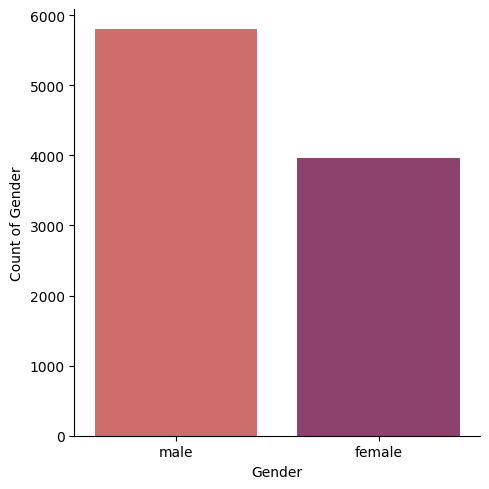

In [ ]:
sns.catplot(x="gender", kind="count", palette="flare", data=df_cust_prep)
plt. xlabel("Gender")
plt. ylabel("Count of Gender")
plt.show()

Dari hasil visualisasi di atas, diperoleh bahwa gender customer yang paling banyak melakukan pemesanan ke vendor adalah 'male'.

#### EDA Customer Profiling 2:
Berapakah proporsi tahun kelahiran dari customer?

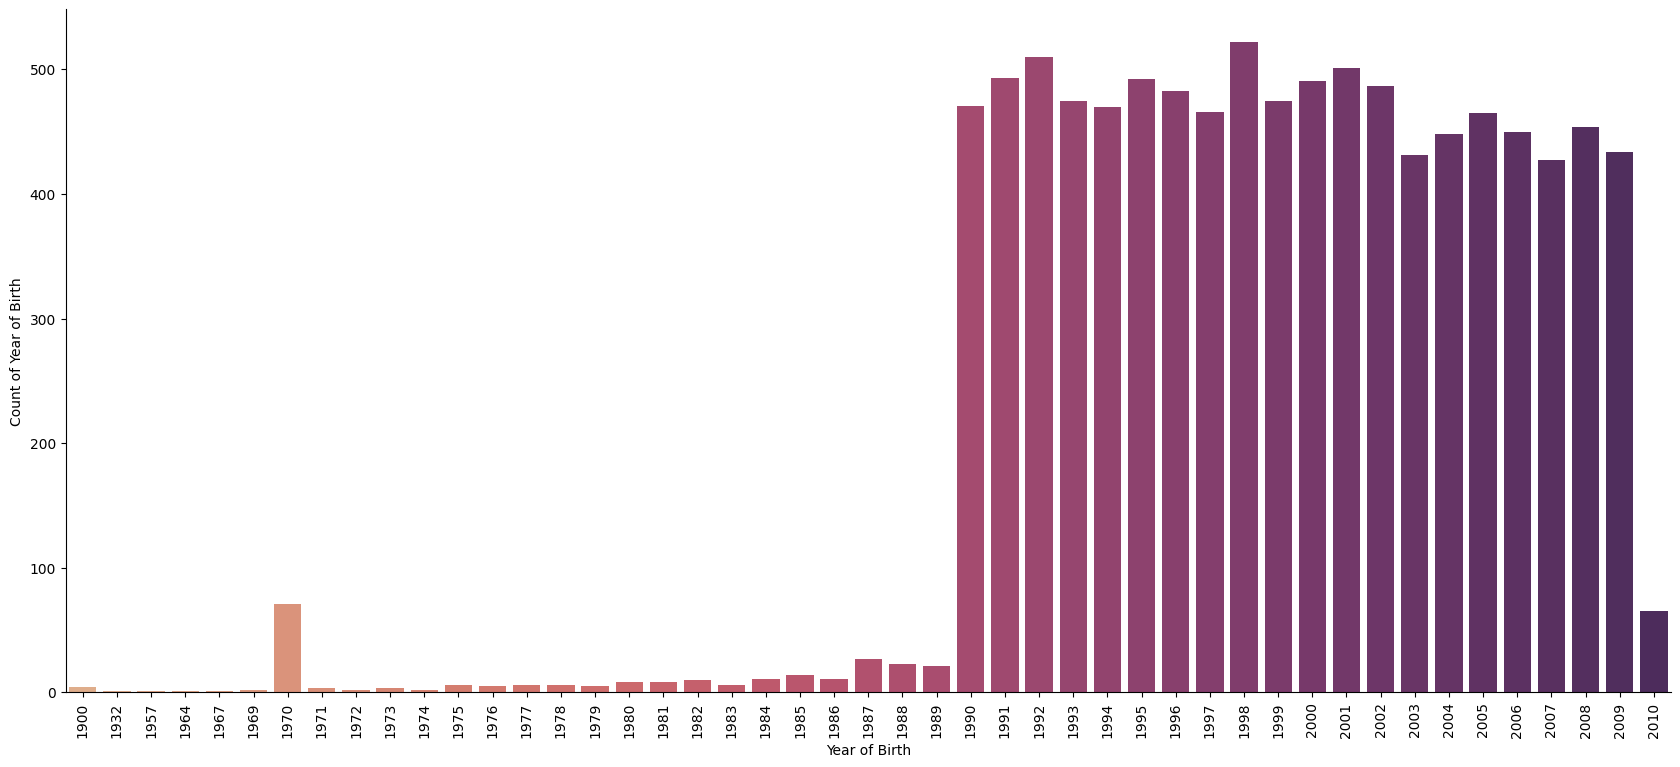

In [ ]:
a = sns.catplot(x="dob", kind="count", palette="flare", data=df_cust_prep)
a.fig.set_size_inches(20,8)
a.set_xticklabels(rotation=90)
plt.xlabel("Year of Birth")
plt.ylabel("Count of Year of Birth")
plt.show()

Dapat dilihat bahwa proporsi tahun kelahiran customer didominasi oleh tahun kelahiran antara tahun 1990 hingga 2009.

Berapakah rata-rata umur dari customer?

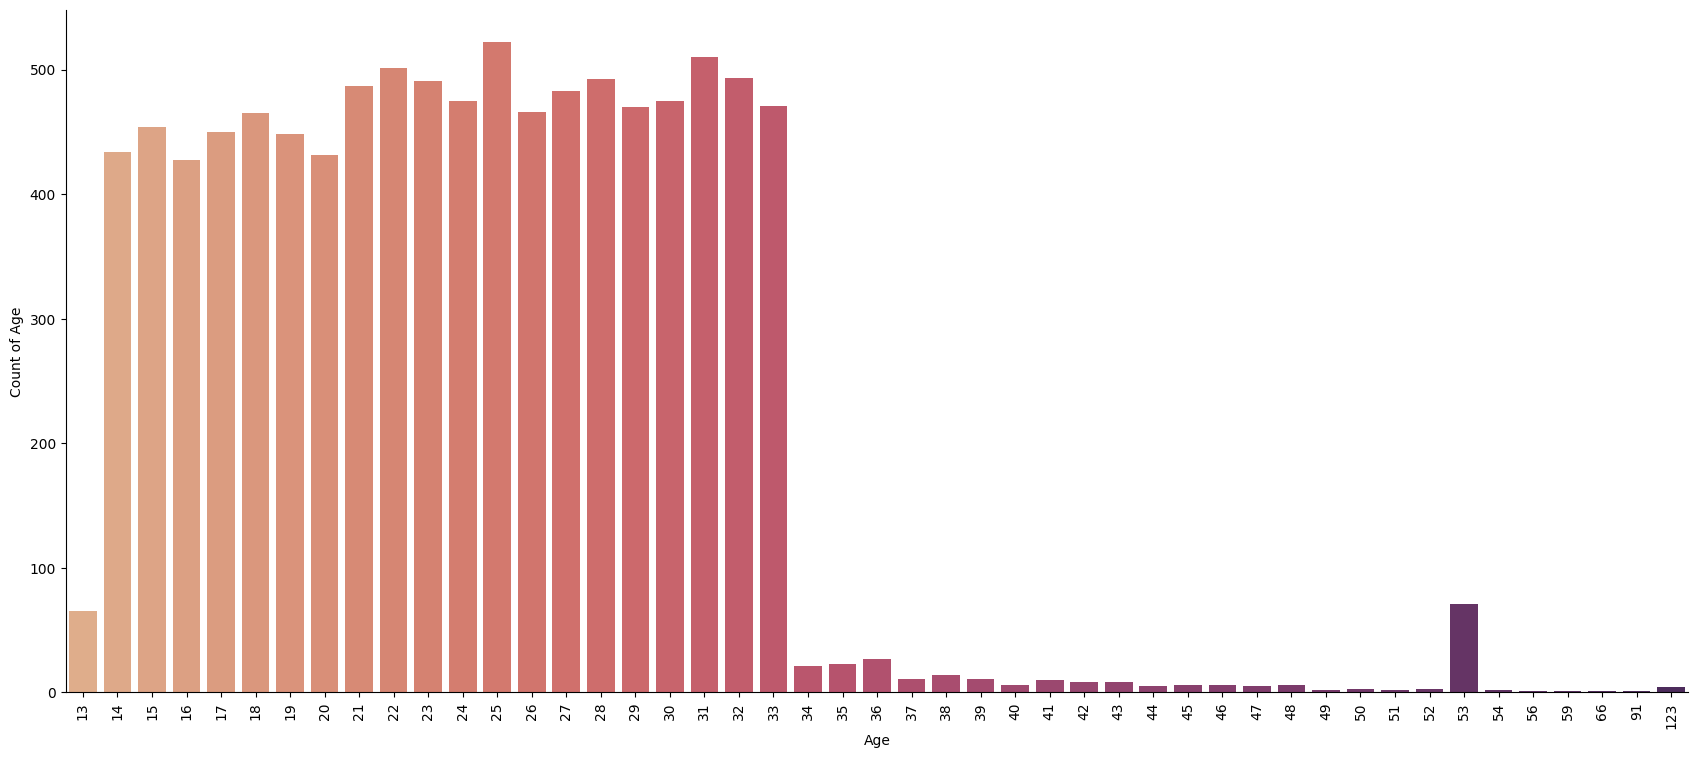

In [ ]:
b = sns.catplot(x="age", kind="count", palette="flare", data=df_cust_prep)
b.fig.set_size_inches(20,8)
b.set_xticklabels(rotation=90)
plt.xlabel("Age")
plt.ylabel("Count of Age")
plt.show()

Kelahiran tahun 1999 hingga 2009 berarti customer didominasi oleh rentang umur 14 hingga 33 tahun.

In [ ]:
df_cust_prep['age'].describe()

count    9768.000000
mean       24.187961
std         6.956438
min        13.000000
25%        19.000000
50%        24.000000
75%        29.000000
max       123.000000
Name: age, dtype: float64

In [ ]:
c = px.box(df_cust_prep, x="age", labels=dict(age="Age"))
c.show()

Diperoleh bahwa rata-rata umur customer adalah 24 tahun dan mediannya juga 24 tahun.

#### EDA Customer Profiling 3:
Bagaimana hubungan antara gender dan umur customer?

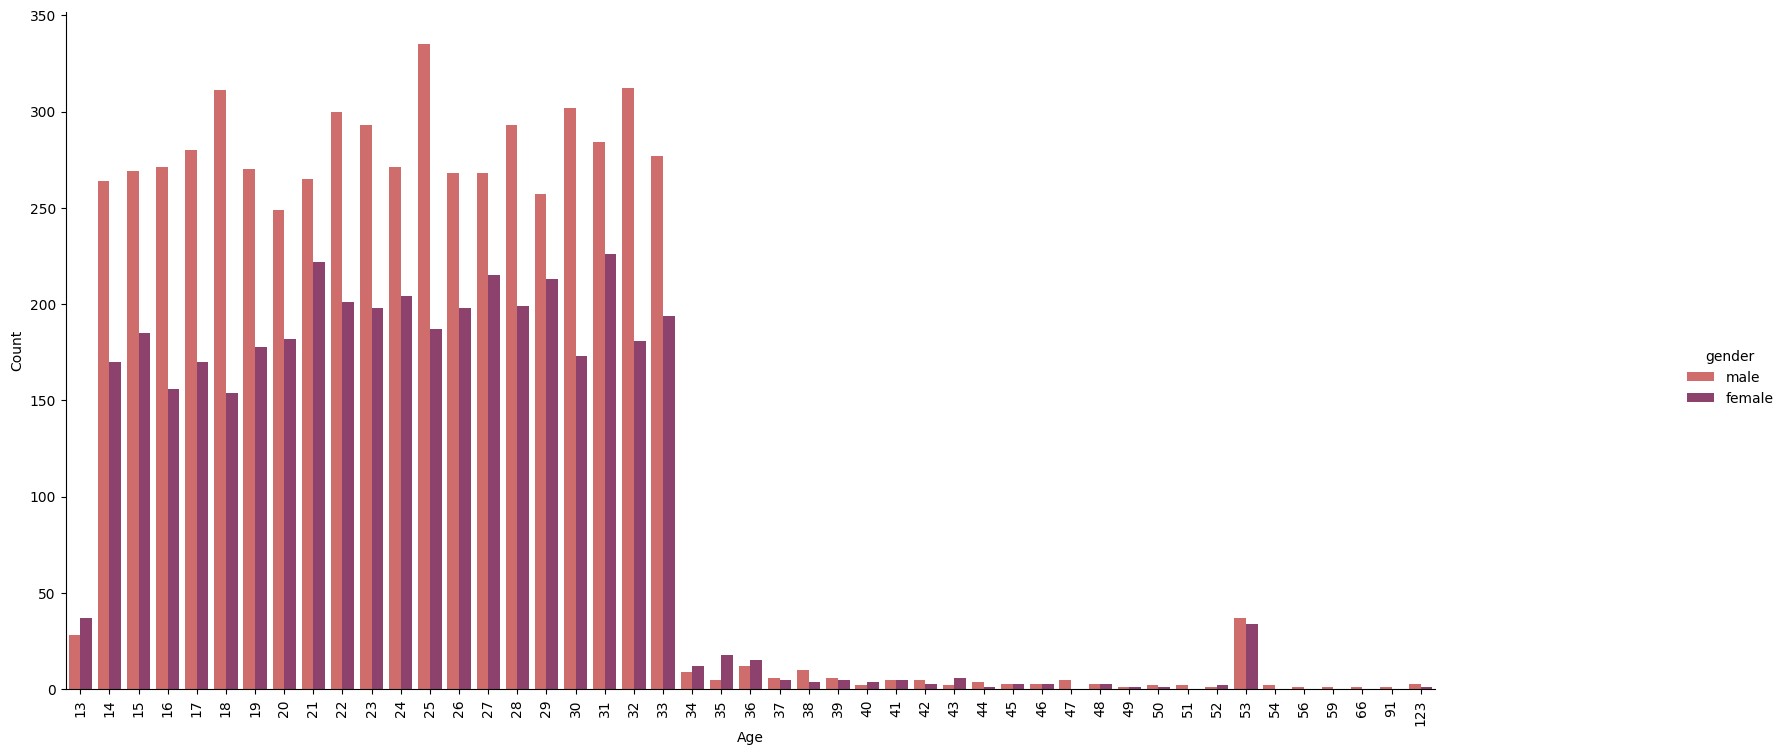

In [ ]:
d = sns.catplot(x="age", hue='gender', kind="count", palette="flare", data=df_cust_prep)
d.fig.set_size_inches(20,8)
d.set_xticklabels(rotation=90)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Masih didominasi oleh rentang umur 14 tahun hingga umur 33, namun dapat dilihat bahwa customer male customer yang melakukan pemesanan ke vendor paling banyak berumur 25 tahun, sedangkan customer 'female' yang melakukan pemesanan ke vendor paling banyak berumur 21 dan 31 tahun.

### Transaction Analysis

Transaction Analysis:
1. Kapan penjualan tertinggi restoran terjadi berdasarkan grand total?
2. Kapan penjualan tertinggi restoran terjadi berdasarkan jumlah item?
3. Bagaimana korelasi antara jumlah item dan grand total?
4. Bagaimana hubungan antara gender customer dan grand total?
5. Bagaimana hubungan antara umur customer dan grand total?
6. Bagaimana proporsi dari payment mode?
7. Bagaimana proporsi dari driver rating?
8. Bagaimana proporsi dari nomor lokasi?


#### EDA Transaction Analysis 1:
Kapan penjualan tertinggi restoran terjadi berdasarkan grand total?

Dibutuhkan grouping berdasarkan kolom 'created_at_date' dengan menjumlahkan value 'grand_total' dan 'item_count' (sekalian dapat digunakan hingga EDA Transaction Analysis 3).

In [ ]:
sliced_data = df_ord_prep.groupby(by=['created_at_date'], dropna=False).sum()[['grand_total', 'item_count']].reset_index()
sliced_data.head()

,created_at_date,grand_total,item_count
0,2019-06-01,197.2,30
1,2019-06-02,258.3,47
2,2019-06-03,101.4,17
3,2019-06-04,206.1,39
4,2019-06-05,463.6,66


In [ ]:
e = px.line(sliced_data, x="created_at_date", y="grand_total", labels=dict(created_at_date="Date", grand_total="Grand Total"))
e.show()

Dapat dilihat dengan jelas bahwa berdasarkan grand total, penjualan biasanya berkisar antara 0 hingga 1000, namun terdapat suatu lonjakan tinggi pada tanggal 1 Oktober 2019 dan 10 Oktober 2019. Penjualan terbesar terjadi pada tanggal 10 Oktober 2019 dengan grand total 3.847,6 dan penjualan terbesar kedua terjadi pada tanggal 1 Oktober 2019 dengan grand total 2.988,9. Dengan demikian, dapat dianalisis lebih lanjut apakah terdapat suatu event penting pada tanggal tersebut? 

#### EDA Transaction Analysis 2:
Kapan penjualan tertinggi restoran terjadi berdasarkan jumlah item?

In [ ]:
f = px.line(sliced_data, x="created_at_date", y="item_count", labels=dict(created_at_date="Date", item_count="Item Count"))
f.show()

Dari hail visualisasi di atas, dapat ditemukan jawaban mengenai mengapa terjadi lonjakan tinggi pada grand total pada tanggal 1 Oktober 2019 dan 10 Oktober 2019. Hal tersebut dikarenakan banyaknya jumlah item yang dijual pada tangal tersebut, sehingga dapat mempengaruhi grand total.

#### EDA Transaction Analysis 3:
Bagaimana korelasi antara jumlah item dan grand total?

In [ ]:
g = px.scatter(sliced_data, x="item_count", y="grand_total", labels=dict(item_count="Jumlah Item", grand_total="Grand Total"))
g.show()

Dapat terkonfirmasi bahwa semakin banyak item yang terjual, maka biayanya semakin banyak.

#### EDA Transaction Analysis 4:
Bagaimana hubungan antara gender customer dan grand total?

Mula-mula dilakukan join/merge Tabel Orders dan Customer karena data gender dan grand total berada di tabel yang terpisah (Tabel join ini juga dibutuhkan pada EDA TA 5).

In [ ]:
df_join_ord_cust = df_ord_prep.merge(df_cust_prep, how='left', on='customer_id')
df_join_ord_cust.head()

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,delivery_distance,vendor_id,created_at_x,location_number,created_at_date,gender,dob,status,verified,created_at_y,updated_at,age
0,163241,9ZTJB1L,2,14.4,1,Yes,No,0,0.0,83,2019-08-01 05:31:33,0,2019-08-01,male,1995,1,1,2019-02-27 21:06:48,2019-02-27 21:06:47,28
1,163246,6C7D1O2,3,18.2,2,Yes,No,0,0.0,83,2019-08-01 05:37:05,0,2019-08-01,female,2001,1,1,2020-01-15 02:19:43,2020-01-15 02:20:06,22
2,163265,VCBBSUB,1,4.6,1,Yes,No,0,0.0,78,2019-08-01 06:03:59,0,2019-08-01,male,1991,1,1,2019-11-15 21:03:25,2019-11-16 17:56:56,32
3,163274,ZBNP36W,1,5.7,1,Yes,No,0,0.0,195,2019-08-01 06:34:38,0,2019-08-01,female,2008,1,1,2019-06-22 00:20:11,2019-10-01 18:47:24,15
4,163321,BJ1GYQY,2,15.8,1,Yes,No,0,0.0,75,2019-08-01 17:06:17,0,2019-08-01,male,2002,1,1,2018-12-30 22:41:48,2018-12-30 22:41:48,21


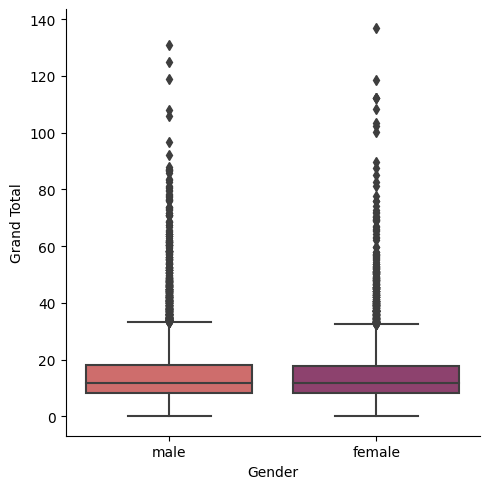

In [ ]:
sns.catplot(x="gender", 
            y="grand_total", palette="flare", kind="box", data=df_join_ord_cust)
plt.xlabel("Gender")
plt.ylabel("Grand Total")
plt.show()

Hasil visualisasi di atas tidak terlalu menunjukkan perbedaan signifikan dari kontibusi male dan female dalam proses transaksi.

#### EDA Transaction Analysis 5:
Bagaimana hubungan antara umur customer dan grand total?

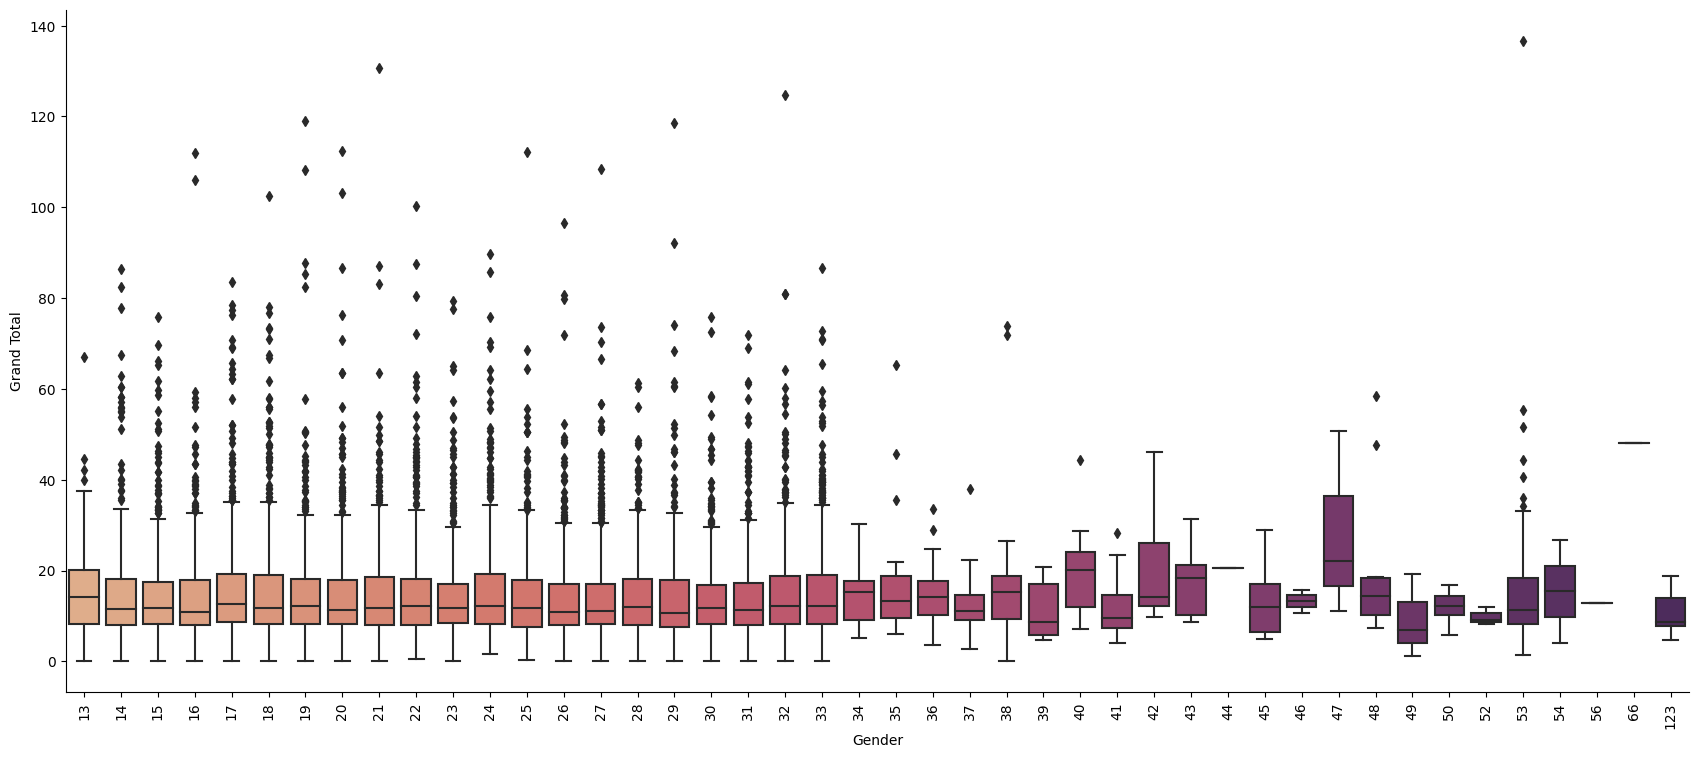

In [ ]:
h = sns.catplot(x="age", 
            y="grand_total", palette="flare", kind="box", data=df_join_ord_cust)
h.fig.set_size_inches(20,8)
h.set_xticklabels(rotation=90)
plt.xlabel("Gender")
plt.ylabel("Grand Total")
plt.show()

Informasi yang dapat diperoleh dari informasi di atas adalah bahwa nilai tengah grand total untuk masing umur sekitar 15 hingga 20, namun jika diperhatikan outlier yang dihasilkan bahwa penyumbang grand total yang besar didominasi oleh customer dengan rentang umur 16 hingga 32 tahun dengan jumlah transaksi terbesar dilakukan oleh customer dengan umur 21 tahun.

#### EDA Transaction Analysis 6:
Bagaimana proporsi dari payment mode?

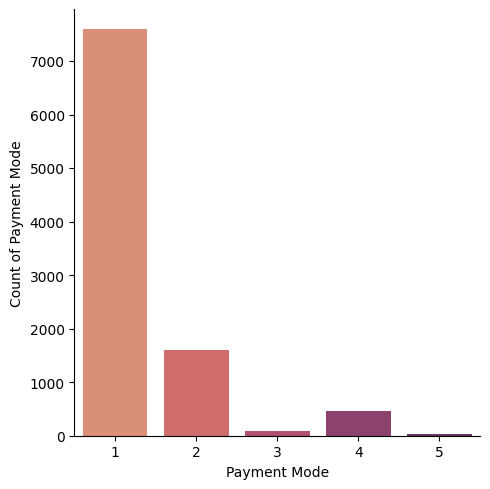

In [ ]:
sns.catplot(x="payment_mode", kind="count", palette="flare", data=df_ord_prep)
plt.xlabel("Payment Mode")
plt.ylabel("Count of Payment Mode")
plt.show()

Hasil visualisasi menunjukkan bahwa tipe Payment Mode 1 paling banyak digunakan untuk bertransaksi, sehingga untuk ke depannya dapat memaksimalkan tata cara Payment Mode 1.

#### EDA Transaction Analysis 7:
Bagaimana proporsi dari driver rating?

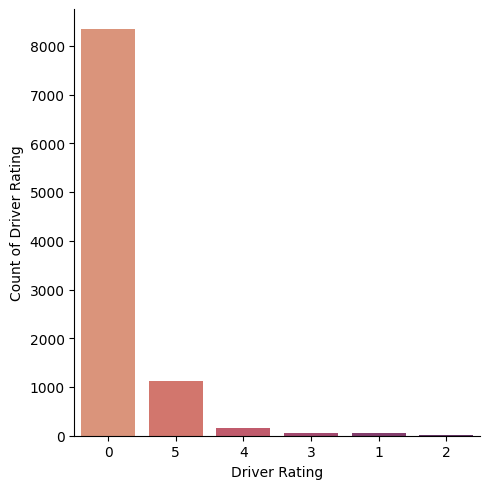

In [ ]:
sns.catplot(x="driver_rating", kind="count", palette="flare", data=df_ord_prep)
plt.xlabel("Driver Rating")
plt.ylabel("Count of Driver Rating")
plt.show()

Informasi yang dapat diperoleh adalah bahwa rating driver terbanyak adalah 0. Hal ini dapat ditelusuri lebih lanjut mengapa rating driver terbanyak adalah 0 agar dapat memuaskan customer dalam waktu ke depan.

#### EDA Transaction Analysis 8:
Bagaimana proporsi dari nomor lokasi?

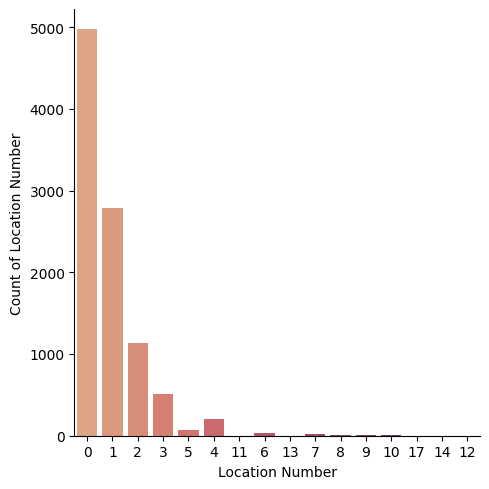

In [ ]:
sns.catplot(x="location_number", kind="count", palette="flare", data=df_ord_prep)
plt.xlabel("Location Number")
plt.ylabel("Count of Location Number")
plt.show()

Informasi yang dapat diperoleh adalah bahwa nomor lokasi customer terbanyak adalah 0, sehingga untuk ke depannya dapat memaksimalkan pengiriman ke nomor lokasi 0 dan juga bisa dipetimbangkan untuk menambahkan cabang di lokasi nomor 0.

### Vendor Profiling

Vendor Profiling:
1. Berapakah proporsi vendor yang melakukan suplai produk?
2. Berapakah proporsi kategori dari vendor?
3. Berapakah proporsi rating dari vendor?

#### EDA Vendor Profiling 1:
Berapakah proporsi vendor yang melakukan suply produk?

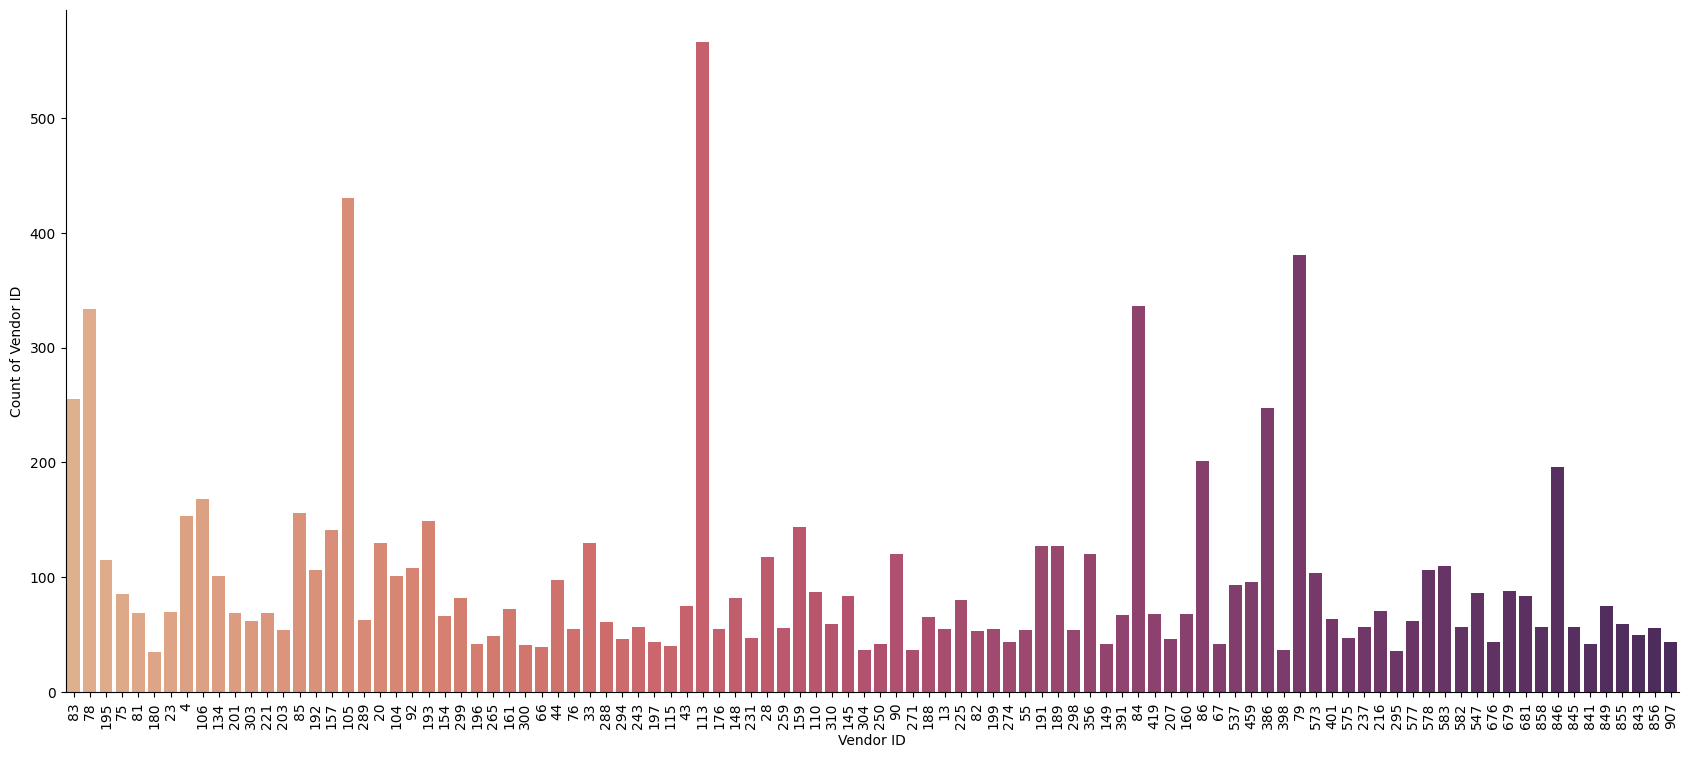

In [ ]:
i = sns.catplot(x="vendor_id", kind="count", palette="flare", data=df_ord_prep)
i.fig.set_size_inches(20,8)
i.set_xticklabels(rotation=90)
plt.xlabel("Vendor ID")
plt.ylabel("Count of Vendor ID")
plt.show()

Dari hasil visualisasi di atas, diperoleh bahwa vendor yang paling banyak melakukan suplai produk adalah vendor dengan vendor id 113, diikuti dengan vendor id 105, 79, 84, 78. Dengan diketahui beberapa vendor yang paling banyak melakukan suply produk, maka dapat dijadikan pertimbangan vendor mana saja yang bisa berlanjut untuk mensuplai produk.

#### EDA Vendor Profiling 2:
Berapakah proporsi kategori dari vendor?

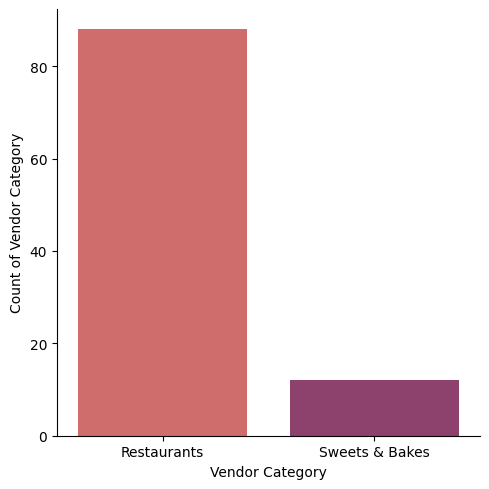

In [ ]:
sns.catplot(x="vendor_category_en", kind="count", palette="flare", data=df_ven_prep)
plt.xlabel("Vendor Category")
plt.ylabel("Count of Vendor Category")
plt.show()

Hasil di atas menunjukkan bahwa kategori vendor paling banyak adalah restoran.

#### EDA Vendor Profiling 3:
Berapakah proporsi rating dari vendor?

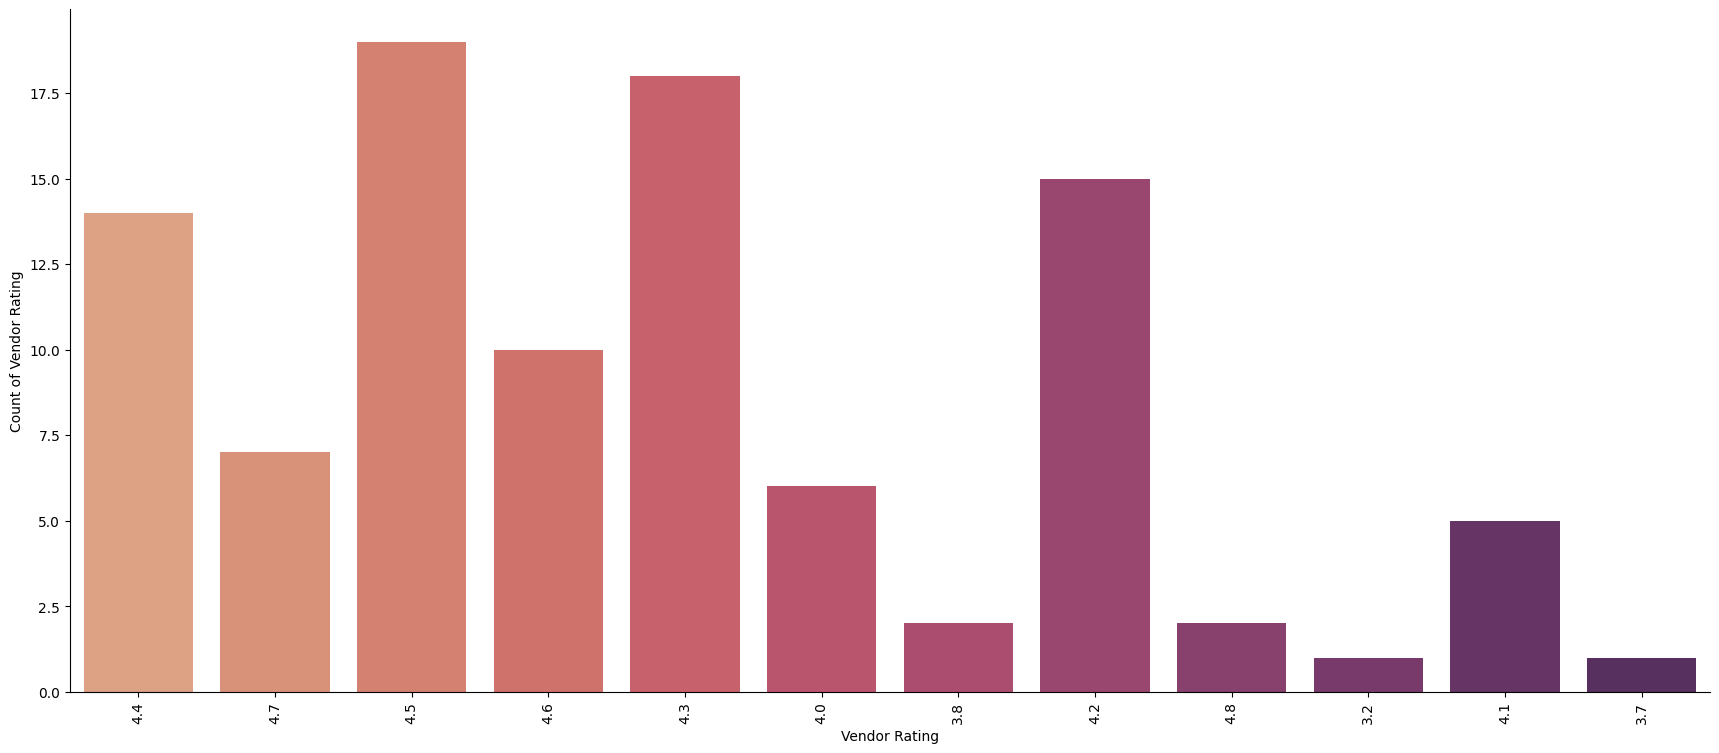

In [ ]:
j = sns.catplot(x="vendor_rating", kind="count", palette="flare", data=df_ven_prep)
j.fig.set_size_inches(20,8)
j.set_xticklabels(rotation=90)
plt.xlabel("Vendor Rating")
plt.ylabel("Count of Vendor Rating")
plt.show()

Hasil di atas menunjukkan bahwa rating vendor terbanyak berkisar antara 4,2 hingga 4,5. Hal ini berarti bahwa vendor-vendor sudah sangat memuaskan. Jadi bisa dipertimbangkan untuk cut off vendor dengan rating di bawah 4,2.

In [ ]:
df_ven_prep_2 = df_ven_prep.copy()

In [ ]:
df_ven_prep_2['vendor_rating'] = df_ven_prep_2['vendor_rating'].astype(float)
df_ven_prep_2.dtypes

vendor_id                      object
authentication_id              object
latitude                      float64
longitude                     float64
vendor_category_en             object
delivery_charge               float64
serving_distance              float64
is_open                        object
opening_time                   object
preparation_time                int64
discount_percentage           float64
status                         object
verified                       object
rank                           object
vendor_rating                 float64
vendor_tag                     object
vendor_tag_name                object
created_at             datetime64[ns]
updated_at             datetime64[ns]
device_type                    object
dtype: object

In [ ]:
sliced_data_2 = df_ven_prep_2.groupby(by=['vendor_id'], dropna=False).mean()['vendor_rating'].reset_index()
sliced_data_2.head()

,vendor_id,vendor_rating
0,104,4.5
1,105,4.5
2,106,4.5
3,110,4.6
4,113,4.7


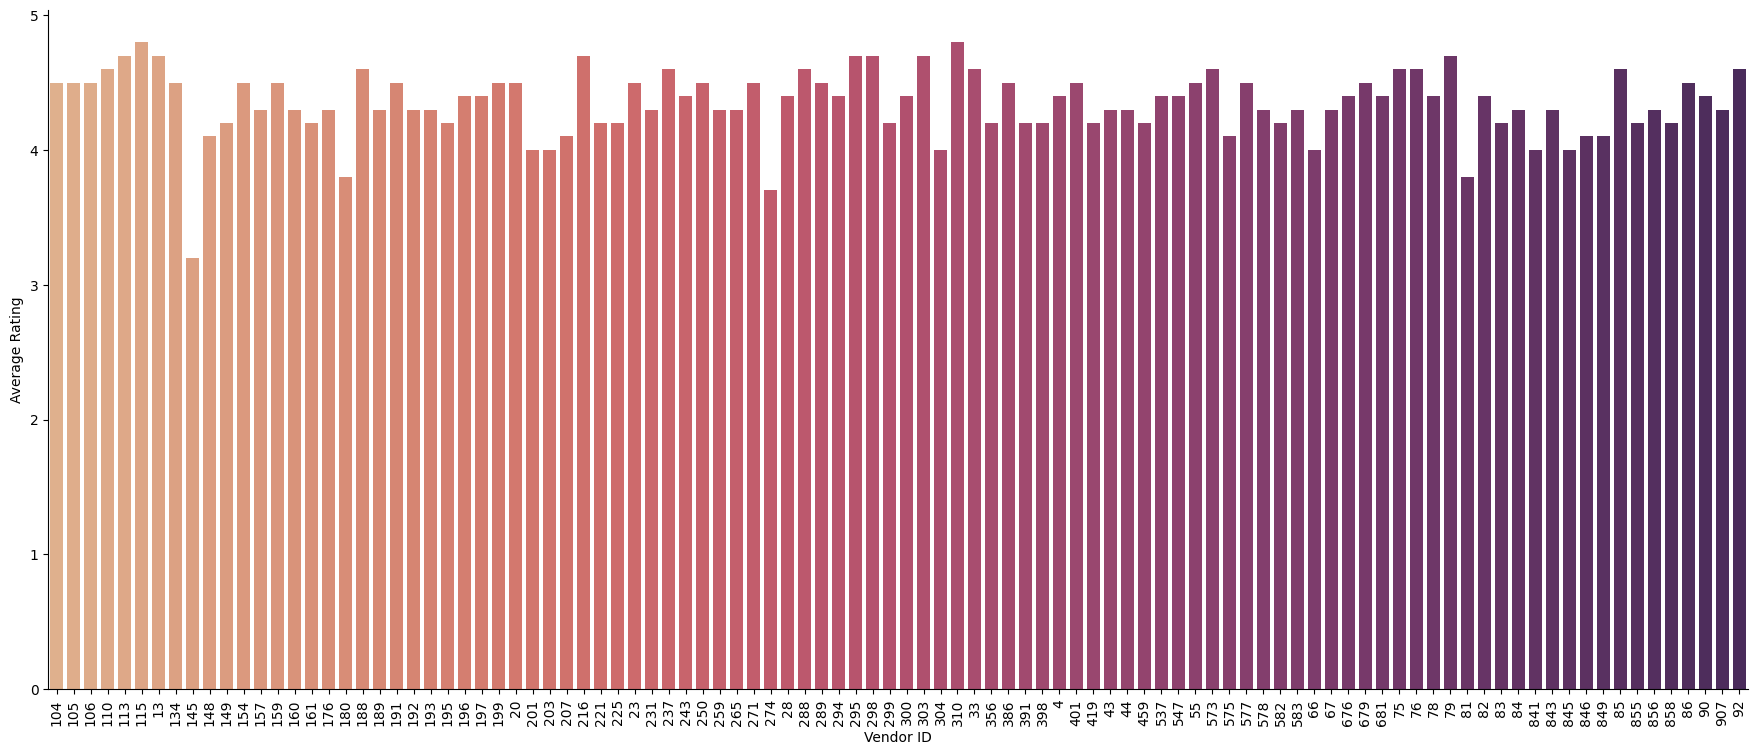

In [ ]:
k =sns.catplot(x="vendor_id", y="vendor_rating", kind="bar", palette="flare", data=sliced_data_2)
k.fig.set_size_inches(20,8)
k.set_xticklabels(rotation=90)
plt.xlabel("Vendor ID")
plt.ylabel("Average Rating")
plt.show()

## **Insight and Recommendations**

### Insights

Insight: \
1. Dari segi generasi, customer yang banyak melakukan transaksi adalah customer dengan generasi milenial dan generasi Z
2. Terdapat lonjakan transaksi pada suatu hari di Bulan Oktober 2019
3.Diperoleh vendor dengan rating tinggi dan rating rendah


### Recommendations

Recommendations: \
1. Melakukan analisis lebih lanjut mengenai produk favorit dari customer dengan generasi tersebut
2. Melakukan analisis lebih lanjut mengenai hari tersebut
3. Melanjutkan menggunakan vendor dengan rating tinggi dan meninggalkan vendor dengan rating rendah
